## Social media sentiment analysics ##

<b>IMPORT LIBRARIES </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite

<b>LOAD DATASE </b>

In [2]:
data = pd.read_csv("Tweets.csv")
print("Shape of data:" , data.shape)
data

Shape of data: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


<b> TAKING BRIEF INFORMATION OF DATASET </b>

In [3]:
data.describe

<bound method NDFrame.describe of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativere

In [4]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [5]:
data.size

219600

In [6]:
data.corr() # for finding co-relation btw the variables

<ipython-input-6-b93fcbcaab11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # for finding co-relation btw the variables


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


In [7]:
data.isnull().sum() #tells how many data points are missing in our column

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
def deal_missing_values(x_full):
    # Drop columns
    x_full = x_full.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)
    
    # Replace null values in 'negativereason_confidence' with the mean
    x_full['negativereason_confidence'].fillna(x_full['negativereason_confidence'].mean(), inplace=True)
    
    return x_full

data = deal_missing_values(data)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     14640 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 915.1+ KB


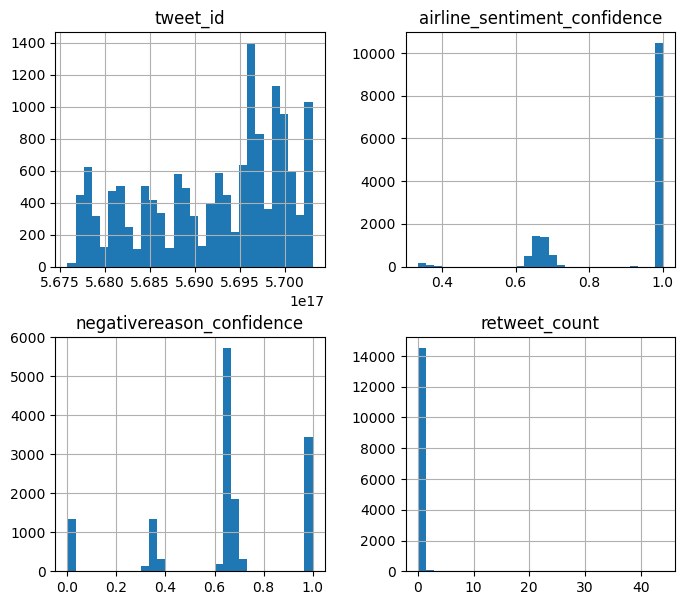

In [9]:
import matplotlib.pyplot as plt

# Assuming you want to create histograms for all columns in your DataFrame 'data'
data.hist(bins=30, figsize=(8, 7))
plt.show()

In [17]:
data.dropna(subset=['airline_sentiment_gold', 'negativereason_gold'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1286 to 12039
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      32 non-null     int64  
 1   airline_sentiment             32 non-null     object 
 2   airline_sentiment_confidence  32 non-null     float64
 3   negativereason                32 non-null     object 
 4   negativereason_confidence     32 non-null     float64
 5   airline                       32 non-null     object 
 6   airline_sentiment_gold        32 non-null     object 
 7   name                          32 non-null     object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 32 non-null     int64  
 10  text                          32 non-null     object 
 11  tweet_coord                   3 non-null      object 
 12  tweet_created                 32 non-null     object 
 13  t

In [19]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,3.200000e+01,32.000000,32.000000,32.000000
mean,5.691434e+17,0.965791,0.774125,0.093750
std,7.637868e+14,0.059219,0.189340,0.296145
min,5.677515e+17,0.772300,0.451300,0.000000
25%,5.686298e+17,0.948625,0.632925,0.000000
50%,5.692548e+17,1.000000,0.781650,0.000000
75%,5.697353e+17,1.000000,0.956325,0.000000
max,5.702952e+17,1.000000,1.000000,1.000000


In [10]:
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [12]:
data['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [15]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,0.638298,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.000000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [14]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.000000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.000000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,0.638298,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.665900,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.000000,American,daviddtwu,0,@AmericanAir we have 8 ppl so we need 2 know h...,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [16]:
x=data.drop('airline_sentiment', axis=1)
y=data['airline_sentiment']

<b>Training and Test</b>

In [17]:
from sklearn.model_selection import train_test_split
import random
# Generate a random integer between 0 and 100 (you can adjust the range as needed)
random_state_value = random.randint(0, 100)
# Use the random_state_value in train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state_value)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
ct = make_column_transformer((MinMaxScaler() , ["tweet_id"]))
(OneHotEncoder(handle_unknown="ignore"),["airline","retweet_count"])
ct.fit(x_train)
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

# Using LogisticRegression

In [18]:
print(data['airline_sentiment'].value_counts())

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [19]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression(max_iter=1000)

In [20]:
l1.fit(x_train_normal,y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred=l1.predict(x_test_normal)
print(y_pred)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


<b> Find accuracy of the model </b>

In [23]:
from sklearn.metrics import accuracy_score

In [25]:
accl = accuracy_score(y_pred,y_test)*100
print(accl)

61.95355191256831


# Using SVM model

In [26]:
from sklearn.svm import SVC
s1 = SVC()
s1.fit(x_train_normal,y_train)

SVC()

In [28]:
y_preds=s1.predict(x_test_normal)
print(y_preds)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [29]:
accs = accuracy_score(y_preds,y_test)*100
print(accs)

61.95355191256831


# Using Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
d1=DecisionTreeClassifier()
d1.fit(x_train_normal,y_train)

DecisionTreeClassifier()

In [31]:
y_predD=d1.predict(x_test_normal)
print(y_predD)

['negative' 'negative' 'neutral' ... 'positive' 'negative' 'negative']


In [32]:
accd = accuracy_score(y_predD,y_test)*100
print(accd)

49.52185792349727
